In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set_style('white')
%matplotlib inline
from surprise import Dataset, Reader
from surprise import SVD
from surprise import accuracy
from surprise.model_selection import cross_validate, train_test_split
from surprise.prediction_algorithms import knns
from surprise import Reader, Dataset
#prediction model imports
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import SVD
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline
from surprise.model_selection import GridSearchCV
from surprise.similarities import cosine, msd, pearson
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from scipy.sparse import csr_matrix

In [91]:
%pylab inline
import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


In [3]:
#deep learning
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
from keras.models import Model
from keras.layers import Input
from keras.layers.core import Reshape, Dropout, Dense
from keras.layers.merge import Multiply, Dot, Concatenate
from keras.layers.embeddings import Embedding
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras import optimizers
from keras import metrics

Using TensorFlow backend.


In [12]:
review_df = pd.read_csv('review.csv')
review_df.head()

,business_id,date,user_id,stars,review_id,cool,text,useful,funny
0,b'ujmEBvifdJM6h6RLv4wQIg',b'2013-05-07 04:34:36',b'hG7b0MtEbXx5QzbzE6C_VA',1.0,b'Q1sbwvVQXV2734tPgoKj4Q',0,b'Total bill for this horrible service? Over $...,6,1
1,b'NZnhc2sEQy3RmzKTZnqtwQ',b'2017-01-14 21:30:33',b'yXQM5uF2jS6es16SJzNHfg',5.0,b'GJXCdrto3ASJOqKeVWPi6Q',0,"b""I *adore* Travis at the Hard Rock's new Kell...",0,0
2,b'WTqjgwHlXbSFevF32_DJVw',b'2016-11-09 20:09:03',b'n6-Gk65cPZL6Uz8qRm3NYw',5.0,b'2TzJjDVDEuAW6MR5Vuc1ug',0,"b""I have to say that this office really has it...",3,0
3,b'ikCg8xy5JIg_NGPx-MSIDA',b'2018-01-09 20:56:38',b'dacAIZ6fTM6mqwW5uxkskg',5.0,b'yi0R0Ugj_xUx_Nek0-_Qig',0,"b""Went in for a lunch. Steak sandwich was deli...",0,0
4,b'b1b1eb3uo-w561D0ZfCEiQ',b'2018-01-30 23:07:38',b'ssoyf2_x0EQMed6fgHeMyQ',1.0,b'11a8sVPMUFtaC7_ABRkmtw',0,b'Today was my second out of three sessions I ...,7,0


In [13]:
user_df = pd.read_csv('user.csv')
user_df.head()

,review_count,average_stars,user_id,compliment_plain,compliment_note,compliment_list,compliment_profile,elite,compliment_writer,cool,...,friends,compliment_cute,compliment_photos,compliment_more,compliment_cool,compliment_funny,name,funny,yelping_since,fans
0,95,4.03,b'l6BmjZMeQD3rDxWUbiAiow',1,1,0,0,"b'2015,2016,2017'",2,25,...,"b'c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz...",0,0,0,1,1,b'Rashmi',17,b'2013-10-08 23:11:33',5
1,33,3.63,b'4XChL029mKr5hydo79Ljxg',0,0,0,0,b'',0,16,...,"b'kEBTgDvFX754S68FllfCaA, aB2DynOxNOJK9st2ZeGT...",0,0,0,1,1,b'Jenna',22,b'2013-02-21 22:29:06',4
2,16,3.71,b'bc8C_eETBWL0olvFSJJd0w',0,1,0,0,b'',0,10,...,"b'4N-HU_T32hLENLntsNKNBg, pSY2vwWLgWfGVAAiKQzM...",0,0,0,0,0,b'David',8,b'2013-10-04 00:16:10',0
3,17,4.85,b'dD0gZpBctWGdWo9WlGuhlA',2,0,0,0,b'',1,14,...,"b'RZ6wS38wnlXyj-OOdTzBxA, l5jxZh1KsgI8rMunm-GN...",0,0,0,0,0,b'Angela',4,b'2014-05-22 15:57:30',5
4,361,4.08,b'MM4RJAeH6yuaN8oZDSt0RA',57,16,1,0,"b'2015,2016,2017,2018'",25,665,...,"b'mbwrZ-RS76V1HoJ0bF_Geg, g64lOV39xSLRZO0aQQ6D...",0,5,1,80,80,b'Nancy',279,b'2013-10-23 07:02:50',39


In [14]:
biz_df = pd.read_csv('business.csv')
biz_df.head()

,attributes.Alcohol,attributes.WheelchairAccessible,attributes.Corkage,hours.Friday,attributes.HasTV,attributes,attributes.RestaurantsCounterService,attributes.RestaurantsDelivery,attributes.WiFi,city,...,attributes.BikeParking,attributes.DriveThru,attributes.Caters,hours.Wednesday,is_open,attributes.AcceptsInsurance,attributes.ByAppointmentOnly,attributes.Ambience,attributes.HappyHour,attributes.RestaurantsPriceRange2
0,NaN,NaN,NaN,NaN,NaN,{'GoodForKids': 'False'},NaN,NaN,NaN,Phoenix,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1,u'full_bar',NaN,NaN,9:0-1:0,False,"{'RestaurantsReservations': 'True', 'GoodForMe...",NaN,False,u'no',Mississauga,...,False,NaN,True,9:0-0:0,1,NaN,NaN,"{'romantic': False, 'intimate': False, 'classy...",NaN,2
2,u'beer_and_wine',NaN,NaN,17:30-22:0,True,"{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...",NaN,False,u'no',Charlotte,...,True,NaN,False,17:30-21:30,1,NaN,NaN,"{'romantic': False, 'intimate': False, 'touris...",NaN,2
3,NaN,NaN,NaN,8:0-17:0,NaN,NaN,NaN,NaN,NaN,Goodyear,...,NaN,NaN,NaN,8:0-17:0,1,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,7:0-23:0,NaN,"{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",NaN,NaN,NaN,Charlotte,...,NaN,NaN,NaN,7:0-23:0,1,NaN,True,NaN,NaN,NaN


# EDA

In [145]:
user_df.describe()

,review_count,average_stars
count,1.637138e+06,1.637138e+06
mean,2.228770e+01,3.681462e+00
std,7.692236e+01,1.151040e+00
min,0.000000e+00,1.000000e+00
25%,2.000000e+00,3.000000e+00
50%,5.000000e+00,3.890000e+00
75%,1.500000e+01,4.600000e+00
max,1.327800e+04,5.000000e+00


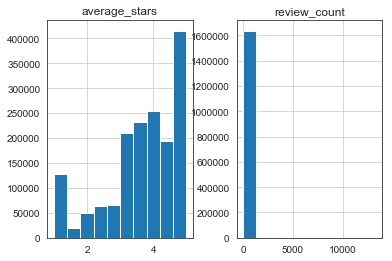

In [142]:
user_df.hist();

In [170]:
user_df

,user_id,review_count,average_stars
0,l6BmjZMeQD3rDxWUbiAiow,95,4.03
1,4XChL029mKr5hydo79Ljxg,33,3.63
2,bc8C_eETBWL0olvFSJJd0w,16,3.71
3,dD0gZpBctWGdWo9WlGuhlA,17,4.85
4,MM4RJAeH6yuaN8oZDSt0RA,361,4.08
...,...,...,...
1637133,oC4BjbB4I-wx5KBAO1k2Gg,2,4.50
1637134,LKd_-BT2GMWp8_1ho18kOg,8,4.00
1637135,ib_elCBhGOamS0AALkh4Og,4,3.40
1637136,WV27LoSFDG_YmiDKTLKKLA,1,3.00


In [146]:
biz_df.describe()

,review_count,stars
count,192609.000000,192609.000000
mean,33.538962,3.585627
std,110.135224,1.018458
min,3.000000,1.000000
25%,4.000000,3.000000
50%,9.000000,3.500000
75%,25.000000,4.500000
max,8348.000000,5.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x23a3ca6a0>,
      dtype=object)

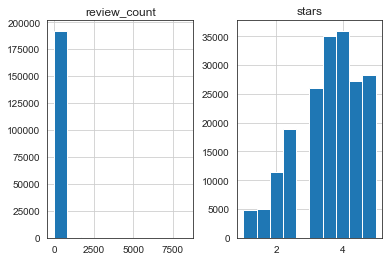

In [147]:
biz_df.hist()

In [10]:
print('Number of Users: ', len(review_df['user_id'].unique()))
print('Number of Businesses: ', len(review_df['business_id'].unique()))

Number of Users:  1637138
Number of Businesses:  192606


# Cleaning Data

In [15]:
# get business id, user id, rating for all reviews
review_df = review_df[['business_id','user_id','stars']]
review_df.business_id = review_df.business_id.apply(lambda x: x[2:-1])
review_df.user_id = review_df.user_id.apply(lambda x: x[2:-1])

In [16]:
# get user id, number of reviews and average rating for all users
user_df = user_df[['user_id','review_count']]
user_df.user_id = user_df.user_id.apply(lambda x: x[2:-1])

In [17]:
# get name, business id and review count for all businesses
biz_df = biz_df[['city','state','business_id','name']]

# Feature Enginering

In [10]:
user_df

,user_id,review_count
0,l6BmjZMeQD3rDxWUbiAiow,95
1,4XChL029mKr5hydo79Ljxg,33
2,bc8C_eETBWL0olvFSJJd0w,16
3,dD0gZpBctWGdWo9WlGuhlA,17
4,MM4RJAeH6yuaN8oZDSt0RA,361
...,...,...
1637133,oC4BjbB4I-wx5KBAO1k2Gg,2
1637134,LKd_-BT2GMWp8_1ho18kOg,8
1637135,ib_elCBhGOamS0AALkh4Og,4
1637136,WV27LoSFDG_YmiDKTLKKLA,1


In [18]:
# get users with more than 120 reviews and less than 60
user_120 = user_df[(user_df.review_count <= 120) & (user_df.review_count >= 60)]

In [19]:
user_120

,user_id,review_count
0,l6BmjZMeQD3rDxWUbiAiow,95
11,_DaFdmq0gtXf1spn1qC_1Q,77
31,DvIlmSleoauEoR3fY0Kf5w,108
37,QiDtS54JwTGeH81c-a84WQ,100
42,NmC_ZemjAQ6TvzgeaAuTmA,87
...,...,...
1634889,z8dHBJGGR8WJ5ol7zijKUg,75
1635296,fjXx4PMMqnYkLsLQ2fyL3Q,82
1635377,FetK6WnZ48HltLzDxzBIwA,65
1635807,teAz9pxrSswiiSWN_-ZOxg,65


In [20]:
# get all businesses Las Vegas
lv_df = biz_df[biz_df['city'] == 'Las Vegas']
lv_df

,city,state,business_id,name
7,Las Vegas,NV,gbQN7vr_caG_A1ugSmGhWg,Supercuts
17,Las Vegas,NV,PZ-LZzSlhSe9utkQYU8pFg,Carluccio's Tivoli Gardens
18,Las Vegas,NV,nh_kQ16QAoXWwqZ05MPfBQ,Myron Hensel Photography
20,Las Vegas,NV,dFMxzHygTy6F873843dHAA,Fremont Arcade
22,Las Vegas,NV,KWywu2tTEPWmR9JnBc0WyQ,Hunk Mansion
...,...,...,...,...
192580,Las Vegas,NV,SoPVLaoQlHuoZlt4fQBXTw,Laguna Champagne Bar
192584,Las Vegas,NV,XlRGtOjPuiEfZsKuo2fRdw,Costco Hearing Aid Center
192586,Las Vegas,NV,6tOKoZX1Gj3Uzjc1-JzYNQ,Premier Landscape Maintenance
192598,Las Vegas,NV,vIAEWbTJc657yN8I4z7whQ,Starbucks


In [81]:
# merge user_120 and review_df to get user's review information for all restaurants
user_review_df = pd.merge(user_120, review_df)
user_review_df

,user_id,review_count,business_id,stars
0,l6BmjZMeQD3rDxWUbiAiow,95,XUA7xA7myMaCuN6G3xYdIA,2.0
1,l6BmjZMeQD3rDxWUbiAiow,95,6sAR0qQp1TiEBKsALJDzVA,5.0
2,l6BmjZMeQD3rDxWUbiAiow,95,wib5LeUWBkxu67Rl3ruMDQ,5.0
3,l6BmjZMeQD3rDxWUbiAiow,95,wygqdsRpyEWUtZL-biMsgw,4.0
4,l6BmjZMeQD3rDxWUbiAiow,95,SQk1H8KYdkTm4gElFZtlrA,3.0
...,...,...,...,...
745539,z8dHBJGGR8WJ5ol7zijKUg,75,YTCCJ3ShO-zg0dlx1nk6dw,1.0
745540,fjXx4PMMqnYkLsLQ2fyL3Q,82,AV6weBrZFFBfRGCbcRGO4g,2.0
745541,FetK6WnZ48HltLzDxzBIwA,65,BlD3wlsLIGRT5imf2hEljA,5.0
745542,teAz9pxrSswiiSWN_-ZOxg,65,BIBWGO_r_1znnlmLbp4Nxg,2.0


In [82]:
# merge lv_df and user_review_df to get user's review information for restaurants in Las Vegas
user_lv_df = pd.merge(lv_df,user_review_df,on='business_id')

In [83]:
user_lv_df.user_id.nunique()

39085

In [84]:
user_lv_df.business_id.nunique()

18301

In [85]:
# remove duplicates to put in utility matrix
user_lv_df = user_lv_df.groupby(['user_id','business_id']).sum()
user_lv_df.reset_index(inplace=True)

In [86]:
# get utility matrix 
utility_matrix = user_lv_df.pivot(index='user_id', columns='business_id', values='stars')

In [87]:
utility_matrix.head()

business_id,--9e1ONYQuAa-CB_Rrw7Tw,--Y7NhBKzLTbNliMUX_wfg,--e8PjCNhEz32pprnPhCwQ,--o5BoU7qYMALeVDK6mwVg,--q7kSBRb0vWC8lSkXFByA,--z7PM8AGaJP0aBmGMY7RA,-0BxAGlIk5DJAGVkpqBXxg,-0RkJ_uIduNLWQrphbADRw,-0VImVWDeqewaA3th8fzIg,-0qht1roIqleKiQkBLDkbw,...,zxzG2WLlxcxGyTmGtL5Bsw,zya86VD24cM4EhxJQDbp8A,zymuRbVoLoJSSNdBDaFBXg,zyrF7je6qVbaJMPfMG75xg,zyvrQstmpEKIC_KQvK7LGw,zzO9QVUj-XvZ8trNX2lqAg,zzQKdBsml48XHVVzOeqR1A,zzjqFOujmM9surbMANZ_ag,zzsKbL1KMNJqazSqBXskxQ,zzzaIBwimxVej4tY6qFOUQ
user_id,,,,,,,,,,,,,,,,,,,,,
--0zxhZTSLZ7w1hUD2bEwA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
--3l8wysfp49Z2TLnyT0vg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
--O1bi61whjxObUkR0a16w,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
--RlSfc-QmcHFGHyX6aVjA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
--WLHsm-AC4jcol2gOkmCQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Collaborative Filtering

In [92]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(user_lv_df[['user_id','business_id','stars']],reader)

In [93]:
trainset, testset = train_test_split(data, test_size = 0.30, random_state=42)

## KNN Basic

In [94]:
# pearson correlation
knn_basic = knns.KNNBasic(sim_options={'name':'pearson','user_based':False})
knn_basic.fit(trainset)

Computing the pearson similarity matrix...
Done computing similarity matrix.


In [95]:
knn_basic.sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [96]:
predictions = knn_basic.test(testset)
accuracy.rmse(predictions)

RMSE: 1.7082


1.7081674522856822

In [97]:
# cosine similarity
basic_cos = knns.KNNBasic(sim_options={'name':'cosine','user_based':False})
basic_cos.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [98]:
basic_cos.sim

array([[1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [99]:
predictions_cos = basic_cos.test(testset)
accuracy.rmse(predictions_cos)

RMSE: 1.7153


1.7152624035829294

## KNN Baseline

In [100]:
# pearson correlation
knn_baseline = knns.KNNBaseline(sim_options={'name':'pearson','user_based':False})
knn_baseline.fit(trainset)

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.


In [101]:
knn_baseline.sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [102]:
predictions_baseline = knn_baseline.test(testset)
accuracy.rmse(predictions_baseline)

RMSE: 1.6120


1.6120106787468937

In [103]:
# cosine similarity
baseline_cos = knns.KNNBaseline(sim_options={'name':'cosine','user_based':False})
baseline_cos.fit(trainset)

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.


In [104]:
baseline_cos.sim

array([[1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [105]:
predictions_baseline_cos = baseline_cos.test(testset)
accuracy.rmse(predictions_baseline_cos)

RMSE: 1.6301


1.6301496058388292

In [52]:
user_lv_df[user_lv_df.user_id=='SyfftyG4GQFJn8RUHTHPww']

,user_id,business_id,review_count,stars
147615,SyfftyG4GQFJn8RUHTHPww,2weQS-RnoOBhb1KsHKyoSQ,244,3.0
147616,SyfftyG4GQFJn8RUHTHPww,5kOI2lQTcFpFI3Lt-TX9gg,244,1.0
147617,SyfftyG4GQFJn8RUHTHPww,DzKl51tivGJMLiNsQqf38w,244,3.0
147618,SyfftyG4GQFJn8RUHTHPww,Jur1iiejUFw_YCkfDfy1gQ,244,2.0
147619,SyfftyG4GQFJn8RUHTHPww,K7lWdNUhCbcnEvI0NhGewg,244,3.0
147620,SyfftyG4GQFJn8RUHTHPww,MFs5_vACoLxdB5eUB5fXeg,244,4.0
147621,SyfftyG4GQFJn8RUHTHPww,OHFH6ALQqq35NiEbD1eXuw,488,5.0
147622,SyfftyG4GQFJn8RUHTHPww,RESDUcs7fIiihp38-d6_6g,244,2.0
147623,SyfftyG4GQFJn8RUHTHPww,SAIrNOB4PtDA4gziNCucwg,244,3.0
147624,SyfftyG4GQFJn8RUHTHPww,UNI1agsPX2k3eJSJVB91nw,244,4.0


## Singular Value Decomposition

In [106]:
svd = SVD()
svd.fit(trainset)
predictions_svd = svd.test(testset)
accuracy.rmse(predictions_svd)

RMSE: 1.5544


1.5543972445707017

In [107]:
pd.DataFrame(predictions_svd)

,uid,iid,r_ui,est,details
0,ROqW6tl7VyhcwKolGmtxHw,k7WrLT80uGJyfIeXCSs8og,1.0,3.572299,{'was_impossible': False}
1,xyiNYSR0LezUNdI-RhBeRg,ByFMv3p5X1aNeZhU61rDcA,5.0,2.725715,{'was_impossible': False}
2,jfVKNVf1cDlkrIS-NAVhDQ,DkYS3arLOhA8si5uUEmHOw,2.0,4.480894,{'was_impossible': False}
3,hRZyaQ80R9s9ztEBDJqiuw,y3zcQ1nV9H_nk3lEGD_f0A,4.0,3.862367,{'was_impossible': False}
4,pbPwUj0pHr9kTq3CzD8jEA,A4zLP5AyKEEHQr_dWEZKig,5.0,3.915000,{'was_impossible': False}
...,...,...,...,...,...
67120,X1Cy1xsDawDiH0o9dmDIXA,sKA6EOpxvBtCg7Ipuhl1RQ,3.0,4.492087,{'was_impossible': False}
67121,SffN7lfNAS3Nco5tnKRHTQ,MpmFFw0GE_2iRFPdsRpJbA,5.0,4.230311,{'was_impossible': False}
67122,_PN5byES4XWl2vTKLAN6dw,8YTtX5o2sbG-ov0-AazWAQ,5.0,5.000000,{'was_impossible': False}
67123,dq8MGnWzSwky_Q6T1nIQ_Q,dm6sO_Y8JdKTE1ZM955yug,4.0,4.533539,{'was_impossible': False}


# Matrix Factorization

In [108]:
users = user_lv_df.user_id.unique()
user_map = {i:val for i,val in enumerate(users)}
inverse_user_map = {val:i for i,val in enumerate(users)}
restaurants = user_lv_df.business_id.unique()
resaurant_map = {i:val for i,val in enumerate(restaurants)}
inverse_res_map = {val:i for i,val in enumerate(restaurants)}

In [109]:
user_lv_df["user_id"] = user_lv_df["user_id"].map(inverse_user_map)
user_lv_df["business_id"] = user_lv_df["business_id"].map(inverse_res_map)


In [182]:
#deep learning
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
from keras.models import Model
from keras.layers import Input
from keras.layers.core import Reshape, Dropout, Dense
from keras.layers.merge import Multiply, Dot, Concatenate
from keras.layers.embeddings import Embedding
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras import optimizers
from keras import metrics
from keras import initializers
import keras

In [114]:
ratings_train, ratings_test = train_test_split(user_lv_df, test_size=0.2, random_state=0)

In [69]:
# user_lv_df.drop('review_count',axis=1,inplace=True)

KeyError: "['review_count'] not found in axis"

In [115]:
user_lv_df

,user_id,business_id,review_count,stars
0,0,0,114,5.0
1,1,1,113,4.0
2,2,2,98,2.0
3,2,3,98,4.0
4,2,4,98,2.0
...,...,...,...,...
223743,39081,416,61,5.0
223744,39082,732,115,4.0
223745,39083,7669,108,5.0
223746,39084,707,68,4.0


In [116]:
print (f"We have {users.shape[0]} users")
print (f"We have {restaurants.shape[0]} restaurants")

We have 39085 users
We have 18301 restaurants


In [117]:
def mean_squared_error(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true), axis=-1)

from keras import backend
 
def rmse(y_true, y_pred):
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

In [214]:
user_id_input = Input(shape=[1], name='user')
restaurant_id_input = Input(shape=[1], name='restaurant')

embedding_size = 30
user_embedding = Embedding(output_dim=embedding_size, input_dim=users.shape[0],
                           input_length=1, name='user_embedding')(user_id_input)
restaurant_embedding = Embedding(output_dim=embedding_size, input_dim=restaurants.shape[0],
                           input_length=1, name='restaurant_embedding')(restaurant_id_input)

user_vecs = Reshape([embedding_size])(user_embedding)
restaurant_vecs = Reshape([embedding_size])(restaurant_embedding)

y = Dot(1, normalize=False)([user_vecs, restaurant_vecs])

model = Model(inputs=[user_id_input,restaurant_id_input], outputs=y)

model.compile(loss='mse', optimizer="adam",metrics=['mse', 'acc',rmse])


In [215]:
history = model.fit([ratings_train["user_id"], ratings_train["business_id"]]
                    , ratings_train["stars"]
                    , batch_size=64, epochs=50
                    , validation_split=0.2
                    , shuffle=True)


Train on 143198 samples, validate on 35800 samples
Epoch 1/50
143198/143198 [==============================] - 24s 167us/step - loss: 18.3386 - mse: 18.3386 - acc: 0.0000e+00 - rmse: 3.9316 - val_loss: 17.9301 - val_mse: 17.9301 - val_acc: 0.0000e+00 - val_rmse: 3.8985
Epoch 2/50
143198/143198 [==============================] - 24s 167us/step - loss: 15.5371 - mse: 15.5371 - acc: 0.0162 - rmse: 3.5419 - val_loss: 12.7718 - val_mse: 12.7718 - val_acc: 0.0471 - val_rmse: 3.1268
Epoch 3/50
143198/143198 [==============================] - 25s 172us/step - loss: 9.1452 - mse: 9.1452 - acc: 0.1139 - rmse: 2.4669 - val_loss: 8.8268 - val_mse: 8.8268 - val_acc: 0.1248 - val_rmse: 2.4049
Epoch 4/50
143198/143198 [==============================] - 25s 173us/step - loss: 5.8914 - mse: 5.8914 - acc: 0.1963 - rmse: 1.8324 - val_loss: 7.2859 - val_mse: 7.2859 - val_acc: 0.1649 - val_rmse: 2.0982
Epoch 5/50
143198/143198 [==============================] - 24s 170us/step - loss: 4.2482 - mse: 4.2482 -

143198/143198 [==============================] - 24s 169us/step - loss: 0.1420 - mse: 0.1420 - acc: 0.9862 - rmse: 0.1699 - val_loss: 6.3909 - val_mse: 6.3909 - val_acc: 0.1732 - val_rmse: 1.9238
Epoch 41/50
143198/143198 [==============================] - 24s 169us/step - loss: 0.1363 - mse: 0.1363 - acc: 0.9863 - rmse: 0.1695 - val_loss: 6.3991 - val_mse: 6.3991 - val_acc: 0.1710 - val_rmse: 1.9249
Epoch 42/50
143198/143198 [==============================] - 24s 169us/step - loss: 0.1311 - mse: 0.1311 - acc: 0.9872 - rmse: 0.1686 - val_loss: 6.3914 - val_mse: 6.3914 - val_acc: 0.1724 - val_rmse: 1.9227
Epoch 43/50
143198/143198 [==============================] - 24s 169us/step - loss: 0.1260 - mse: 0.1260 - acc: 0.9874 - rmse: 0.1686 - val_loss: 6.3915 - val_mse: 6.3915 - val_acc: 0.1728 - val_rmse: 1.9223
Epoch 44/50
143198/143198 [==============================] - 24s 170us/step - loss: 0.1205 - mse: 0.1205 - acc: 0.9869 - rmse: 0.1677 - val_loss: 6.3937 - val_mse: 6.3937 - val_acc

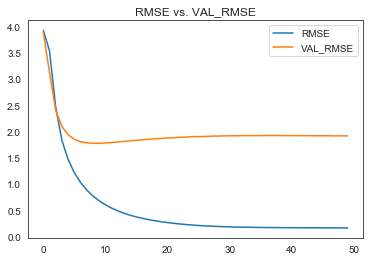

In [249]:
plt.title('RMSE vs. VAL_RMSE')
plt.plot(history.history['rmse'],label='RMSE')
plt.plot(history.history['val_rmse'],label='VAL_RMSE')
plt.legend()

In [126]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import pydot
SVG(model_to_dot(model).create(prog='dot', format='svg'))

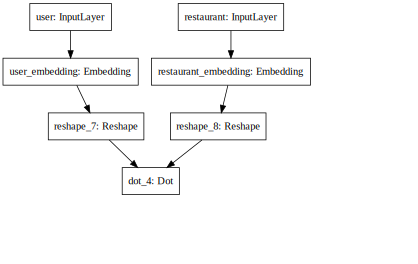

In [127]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

# Neural Network Embeddings

In [217]:
#Merge: Concatenate, optimizer: sgd
user_id_input = Input(shape=[1], name='user')
restaurant_id_input = Input(shape=[1], name='restaurant')

embedding_size = 10
user_embedding = Embedding(output_dim=embedding_size, input_dim=users.shape[0],
                           input_length=1, name='user_embedding')(user_id_input)
restaurant_embedding = Embedding(output_dim=embedding_size, input_dim=restaurants.shape[0],
                           input_length=1, name='restaurant_embedding')(restaurant_id_input)

user_vecs = Reshape([embedding_size])(user_embedding)
restaurant_vecs = Reshape([embedding_size])(restaurant_embedding)

input_vecs = Concatenate()([user_vecs, restaurant_vecs])

x = Dense(128, activation='relu')(input_vecs)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(32, activation='relu')(x)


y = Dense(1)(x)

model_1 = Model(inputs=[user_id_input, restaurant_id_input], outputs=y)

model_1.compile(loss='mse', optimizer="sgd",metrics=['mse', rmse])

In [218]:
earlyStopping = EarlyStopping(monitor='val_rmse', patience=5, verbose=0, mode='min')
mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_rmse', mode='min')
history1 = model_1.fit([ratings_train["user_id"], ratings_train["business_id"]]
                    , ratings_train["stars"]
                    , batch_size=64, epochs=50
                    , validation_split=0.2
                    , shuffle=True)


Train on 143198 samples, validate on 35800 samples
Epoch 1/50
143198/143198 [==============================] - 7s 51us/step - loss: 2.9474 - mse: 2.9474 - rmse: 1.1803 - val_loss: 2.7389 - val_mse: 2.7389 - val_rmse: 1.1277
Epoch 2/50
143198/143198 [==============================] - 8s 54us/step - loss: 2.8516 - mse: 2.8516 - rmse: 1.1538 - val_loss: 2.6443 - val_mse: 2.6443 - val_rmse: 1.1326
Epoch 3/50
143198/143198 [==============================] - 7s 48us/step - loss: 2.7282 - mse: 2.7282 - rmse: 1.1286 - val_loss: 2.5779 - val_mse: 2.5779 - val_rmse: 1.1431
Epoch 4/50
143198/143198 [==============================] - 7s 50us/step - loss: 2.5785 - mse: 2.5785 - rmse: 1.0887 - val_loss: 2.4806 - val_mse: 2.4806 - val_rmse: 1.0840
Epoch 5/50
143198/143198 [==============================] - 7s 49us/step - loss: 2.4537 - mse: 2.4537 - rmse: 1.0553 - val_loss: 2.5158 - val_mse: 2.5158 - val_rmse: 1.0683
Epoch 6/50
143198/143198 [==============================] - 7s 51us/step - loss: 2.3

Epoch 48/50
143198/143198 [==============================] - 8s 55us/step - loss: 1.2730 - mse: 1.2730 - rmse: 0.6870 - val_loss: 2.9761 - val_mse: 2.9761 - val_rmse: 1.1575
Epoch 49/50
143198/143198 [==============================] - 7s 52us/step - loss: 1.2733 - mse: 1.2733 - rmse: 0.6835 - val_loss: 2.9939 - val_mse: 2.9939 - val_rmse: 1.1564
Epoch 50/50
143198/143198 [==============================] - 8s 54us/step - loss: 1.2570 - mse: 1.2570 - rmse: 0.6789 - val_loss: 3.1815 - val_mse: 3.1815 - val_rmse: 1.1906


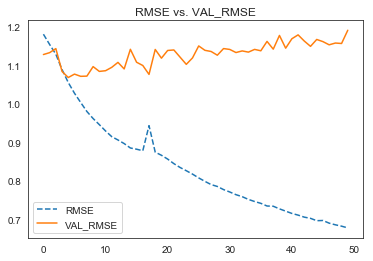

In [242]:
plt.title('RMSE vs. VAL_RMSE')
plt.plot(history1.history['rmse'],linestyle='--',label='RMSE')
plt.plot(history1.history['val_rmse'],label='VAL_RMSE')
plt.legend()

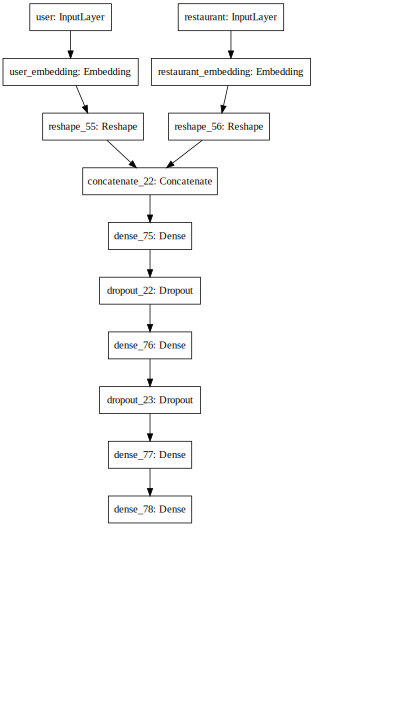

In [220]:
SVG(model_to_dot(model_1).create(prog='dot', format='svg'))

In [221]:
#Optimizer: adamax, with Dropout, with kernel_regularizers, with kernel_initializaers, with leakyReLU layers
user_id_input = Input(shape=[1], name='user')
restaurant_id_input = Input(shape=[1], name='restaurant')

embedding_size = 10
user_embedding = Embedding(output_dim=embedding_size, input_dim=users.shape[0],
                           input_length=1, name='user_embedding')(user_id_input)
restaurant_embedding = Embedding(output_dim=embedding_size, input_dim=restaurants.shape[0],
                           input_length=1, name='restaurant_embedding')(restaurant_id_input)

user_vecs = Reshape([embedding_size])(user_embedding)
restaurant_vecs = Reshape([embedding_size])(restaurant_embedding)

input_vecs = Concatenate()([user_vecs, restaurant_vecs])

x = Dense(128,kernel_initializer=initializers.glorot_normal(seed=2),kernel_regularizer=keras.regularizers.l2(0.3))(input_vecs)
x = keras.layers.LeakyReLU(alpha=0.3)(x)
x = Dropout(0.1)(x)
x = Dense(64,kernel_regularizer=keras.regularizers.l2(0.3))(x)
x = keras.layers.LeakyReLU(alpha=0.3)(x)
x = Dropout(0.1)(x)
x = Dense(32, activation='relu')(x)


y = Dense(1)(x)

model_2 = Model(inputs=[user_id_input, restaurant_id_input], outputs=y)

model_2.compile(loss='mse', optimizer="adamax",metrics=['mse', rmse])

In [222]:
earlyStopping = EarlyStopping(monitor='val_rmse', patience=5, verbose=0, mode='min')
mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_rmse', mode='min')
history2 = model_2.fit([ratings_train["user_id"], ratings_train["business_id"]]
                    , ratings_train["stars"]
                    , batch_size=64, epochs=50
                    , validation_split=0.2
                    , shuffle=True)


Train on 143198 samples, validate on 35800 samples
Epoch 1/50
143198/143198 [==============================] - 10s 68us/step - loss: 3.6874 - mse: 3.0834 - rmse: 1.2115 - val_loss: 2.7419 - val_mse: 2.7411 - val_rmse: 1.1459
Epoch 2/50
143198/143198 [==============================] - 10s 69us/step - loss: 2.9072 - mse: 2.9067 - rmse: 1.1703 - val_loss: 2.7442 - val_mse: 2.7442 - val_rmse: 1.1689
Epoch 3/50
143198/143198 [==============================] - 10s 68us/step - loss: 2.9025 - mse: 2.9021 - rmse: 1.1675 - val_loss: 2.7418 - val_mse: 2.7411 - val_rmse: 1.1516
Epoch 4/50
143198/143198 [==============================] - 10s 70us/step - loss: 2.8997 - mse: 2.8995 - rmse: 1.1648 - val_loss: 2.7421 - val_mse: 2.7419 - val_rmse: 1.1381
Epoch 5/50
143198/143198 [==============================] - 10s 67us/step - loss: 2.8990 - mse: 2.8984 - rmse: 1.1637 - val_loss: 2.7421 - val_mse: 2.7419 - val_rmse: 1.1592
Epoch 6/50
143198/143198 [==============================] - 10s 69us/step - los

143198/143198 [==============================] - 10s 71us/step - loss: 1.9500 - mse: 1.8870 - rmse: 0.7994 - val_loss: 2.6807 - val_mse: 2.6182 - val_rmse: 1.0989
Epoch 48/50
143198/143198 [==============================] - 10s 70us/step - loss: 1.9372 - mse: 1.8763 - rmse: 0.7948 - val_loss: 2.7322 - val_mse: 2.6646 - val_rmse: 1.1092
Epoch 49/50
143198/143198 [==============================] - 11s 75us/step - loss: 1.9368 - mse: 1.8734 - rmse: 0.7941 - val_loss: 2.6585 - val_mse: 2.5976 - val_rmse: 1.0931
Epoch 50/50
143198/143198 [==============================] - 10s 68us/step - loss: 1.9445 - mse: 1.8799 - rmse: 0.7992 - val_loss: 2.6552 - val_mse: 2.5889 - val_rmse: 1.0902


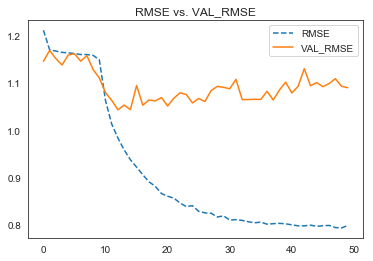

In [239]:
plt.title('RMSE vs. VAL_RMSE')
plt.plot(history2.history['rmse'],linestyle='--',label='RMSE')
plt.plot(history2.history['val_rmse'],label='VAL_RMSE')
plt.legend()

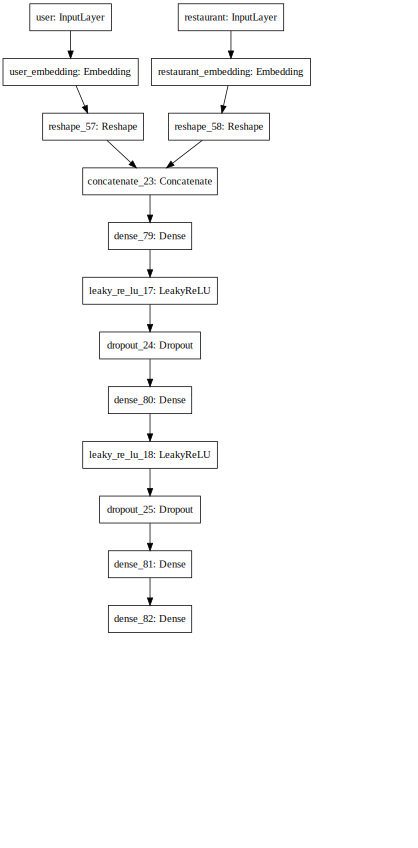

In [224]:
SVG(model_to_dot(model_2).create(prog='dot', format='svg'))

In [225]:
#Optimizer: adamax, with kernel_regularizers, with leakyReLU layers
user_id_input = Input(shape=[1], name='user')
restaurant_id_input = Input(shape=[1], name='restaurant')

embedding_size = 10
user_embedding = Embedding(output_dim=embedding_size, input_dim=users.shape[0],
                           input_length=1, name='user_embedding')(user_id_input)
restaurant_embedding = Embedding(output_dim=embedding_size, input_dim=restaurants.shape[0],
                           input_length=1, name='restaurant_embedding')(restaurant_id_input)

user_vecs = Reshape([embedding_size])(user_embedding)
restaurant_vecs = Reshape([embedding_size])(restaurant_embedding)

input_vecs = Concatenate()([user_vecs, restaurant_vecs])

x = Dense(128,kernel_initializer=initializers.glorot_normal(seed=2),kernel_regularizer=keras.regularizers.l2(0.3))(input_vecs)
x = keras.layers.LeakyReLU(alpha=0.2)(x)
# x = Dropout(0.2)(x)
x = Dense(64,kernel_regularizer=keras.regularizers.l2(0.3))(x)
x = keras.layers.LeakyReLU(alpha=0.2)(x)
# x = Dropout(0.2)(x)
x = Dense(32, activation='relu')(x)


y = Dense(1)(x)

model_3 = Model(inputs=[user_id_input, restaurant_id_input], outputs=y)

model_3.compile(loss='mse', optimizer="adamax",metrics=['mse', rmse])

In [226]:
earlyStopping = EarlyStopping(monitor='val_rmse', patience=5, verbose=0, mode='min')
mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_rmse', mode='min')
history3 = model_3.fit([ratings_train["user_id"], ratings_train["business_id"]]
                    , ratings_train["stars"]
                    , batch_size=64, epochs=50
                    , validation_split=0.2
                    , shuffle=True)

Train on 143198 samples, validate on 35800 samples
Epoch 1/50
143198/143198 [==============================] - 10s 68us/step - loss: 3.8001 - mse: 3.1879 - rmse: 1.2204 - val_loss: 2.7412 - val_mse: 2.7411 - val_rmse: 1.1454
Epoch 2/50
143198/143198 [==============================] - 9s 66us/step - loss: 2.8874 - mse: 2.8870 - rmse: 1.1558 - val_loss: 2.7414 - val_mse: 2.7414 - val_rmse: 1.1558
Epoch 3/50
143198/143198 [==============================] - 9s 64us/step - loss: 2.8849 - mse: 2.8846 - rmse: 1.1529 - val_loss: 2.7431 - val_mse: 2.7430 - val_rmse: 1.1646
Epoch 4/50
143198/143198 [==============================] - 9s 61us/step - loss: 2.8857 - mse: 2.8853 - rmse: 1.1534 - val_loss: 2.7575 - val_mse: 2.7574 - val_rmse: 1.1319
Epoch 5/50
143198/143198 [==============================] - 8s 58us/step - loss: 2.8845 - mse: 2.8843 - rmse: 1.1517 - val_loss: 2.7528 - val_mse: 2.7525 - val_rmse: 1.1872
Epoch 6/50
143198/143198 [==============================] - 9s 60us/step - loss: 2.

Epoch 48/50
143198/143198 [==============================] - 9s 64us/step - loss: 1.9073 - mse: 1.8553 - rmse: 0.7846 - val_loss: 2.6683 - val_mse: 2.6162 - val_rmse: 1.1014
Epoch 49/50
143198/143198 [==============================] - 9s 64us/step - loss: 1.9072 - mse: 1.8554 - rmse: 0.7845 - val_loss: 2.6653 - val_mse: 2.6142 - val_rmse: 1.1018
Epoch 50/50
143198/143198 [==============================] - 10s 67us/step - loss: 1.9005 - mse: 1.8490 - rmse: 0.7811 - val_loss: 2.7678 - val_mse: 2.7145 - val_rmse: 1.1367


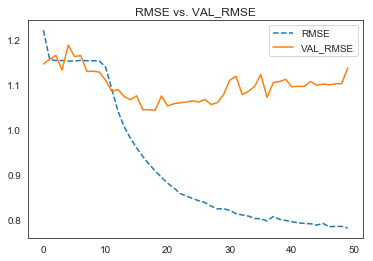

In [240]:
plt.title('RMSE vs. VAL_RMSE')
plt.plot(history3.history['rmse'],linestyle='--', label = 'RMSE')
plt.plot(history3.history['val_rmse'], label = 'VAL_RMSE')
plt.legend()

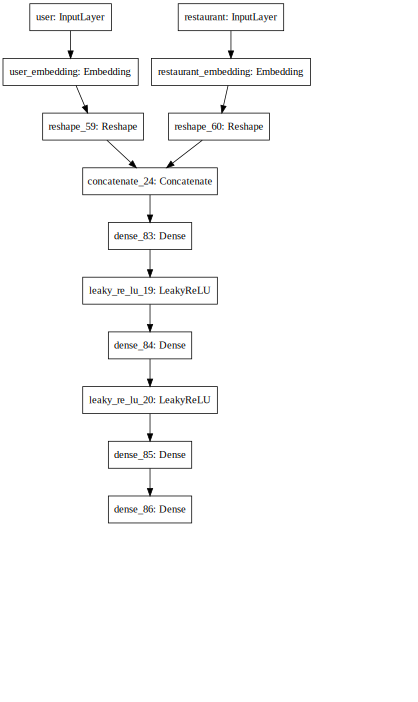

In [228]:
SVG(model_to_dot(model_3).create(prog='dot', format='svg'))

In [243]:
#Merge: Multiply
user_id_input = Input(shape=[1], name='user')
restaurant_id_input = Input(shape=[1], name='restaurant')

embedding_size = 10
user_embedding = Embedding(output_dim=embedding_size, input_dim=users.shape[0],
                           input_length=1, name='user_embedding')(user_id_input)
restaurant_embedding = Embedding(output_dim=embedding_size, input_dim=restaurants.shape[0],
                           input_length=1, name='restaurant_embedding')(restaurant_id_input)

user_vecs = Reshape([embedding_size])(user_embedding)
restaurant_vecs = Reshape([embedding_size])(restaurant_embedding)

input_vecs = Multiply()([user_vecs, restaurant_vecs])

x = Dense(128, activation='relu')(input_vecs)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(32, activation='relu')(x)


y = Dense(1)(x)

model_4 = Model(inputs=[user_id_input, restaurant_id_input], outputs=y)

model_4.compile(loss='mse', optimizer="sgd",metrics=['mse', rmse])

In [244]:
earlyStopping = EarlyStopping(monitor='val_rmse', patience=5, verbose=0, mode='min')
mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_rmse', mode='min')
history4 = model_4.fit([ratings_train["user_id"], ratings_train["business_id"]]
                    , ratings_train["stars"]
                    , batch_size=64, epochs=50
                    , validation_split=0.2
                    , shuffle=True
                    , callbacks= [earlyStopping])


Train on 143198 samples, validate on 35800 samples
Epoch 1/50
143198/143198 [==============================] - 6s 43us/step - loss: 2.9515 - mse: 2.9515 - rmse: 1.1800 - val_loss: 2.7417 - val_mse: 2.7417 - val_rmse: 1.1578
Epoch 2/50
143198/143198 [==============================] - 6s 42us/step - loss: 2.8889 - mse: 2.8889 - rmse: 1.1565 - val_loss: 2.7853 - val_mse: 2.7853 - val_rmse: 1.1459
Epoch 3/50
143198/143198 [==============================] - 6s 42us/step - loss: 2.8861 - mse: 2.8861 - rmse: 1.1549 - val_loss: 2.7441 - val_mse: 2.7441 - val_rmse: 1.1287
Epoch 4/50
143198/143198 [==============================] - 7s 47us/step - loss: 2.8855 - mse: 2.8855 - rmse: 1.1534 - val_loss: 2.7565 - val_mse: 2.7565 - val_rmse: 1.1934
Epoch 5/50
143198/143198 [==============================] - 6s 41us/step - loss: 2.8854 - mse: 2.8854 - rmse: 1.1537 - val_loss: 2.7557 - val_mse: 2.7557 - val_rmse: 1.1308
Epoch 6/50
143198/143198 [==============================] - 7s 49us/step - loss: 2.8

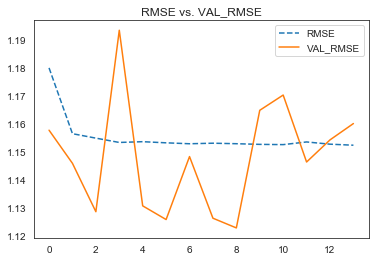

In [245]:
plt.title('RMSE vs. VAL_RMSE')
plt.plot(history4.history['rmse'],linestyle='--', label = 'RMSE')
plt.plot(history4.history['val_rmse'], label = 'VAL_RMSE')
plt.legend()

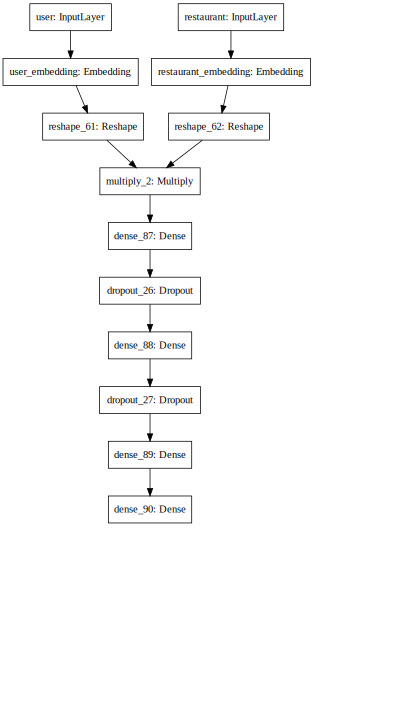

In [246]:
SVG(model_to_dot(model_4).create(prog='dot', format='svg'))